In [177]:
from __future__ import division
import pandas as pd
import json
import numpy as np
import seaborn as sns
from fancyimpute import KNN
%matplotlib inline

In [10]:
with open('ultimate_data_challenge.json') as f:
   data = json.load(f)

In [27]:
df = pd.DataFrame(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [143]:
mask = pd.to_datetime(df.last_trip_date) > '2014-06-01'
df['still_active'] = mask


In [159]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
still_active                 0
dtype: int64

In [150]:
df.still_active.sum()/df.still_active.count()

0.36620000000000003

In [163]:
df[df['avg_rating_of_driver'].isnull()].still_active.sum() / df[df['avg_rating_of_driver'].isnull()].still_active.count()


0.19305589756217681

In [139]:
bycat = df.groupby(['phone', 'city', 'still_active']).size()
bycat = byphone.reset_index()
bycat.columns = [u'phone', u'city', u'still_active', 'amount']
bycat

,phone,city,still_active,amount
0,Android,Astapor,False,4688
1,Android,Astapor,True,556
2,Android,King's Landing,False,1429
3,Android,King's Landing,True,1069
4,Android,Winterfell,False,5963
5,Android,Winterfell,True,1317
6,iPhone,Astapor,False,7732
7,iPhone,Astapor,True,3437
8,iPhone,King's Landing,False,2368
9,iPhone,King's Landing,True,5200


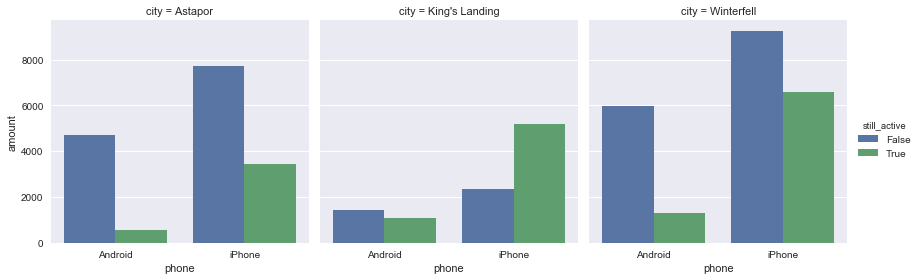

In [142]:
fg = sns.factorplot(x = 'phone',y = 'amount', col = 'city', hue = 'still_active', data = byphone, kind='bar')

,city,still_active,amount
0,Astapor,False,12512
1,Astapor,True,4022
2,King's Landing,False,3823
3,King's Landing,True,6307
4,Winterfell,False,15355
5,Winterfell,True,7981


In [168]:
df = df.join(pd.get_dummies(df.city)).join(pd.get_dummies(df.phone))

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,still_active,Astapor,King's Landing,Winterfell,Android,iPhone
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True,0,1,0,0,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False,1,0,0,1,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False,1,0,0,0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True,0,1,0,0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False,0,0,1,1,0
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,True,0,0,1,0,1
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,False,1,0,0,1,0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,False,0,0,1,0,1
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,False,0,0,1,1,0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,False,0,0,1,1,0


In [175]:
Ys = df['still_active']
df = df[[   u'avg_dist',u'avg_rating_by_driver',u'avg_rating_of_driver',u'avg_surge',
         u'surge_pct', u'trips_in_first_30_days',u'ultimate_black_user',u'weekday_pct',
        u'Astapor',u'King\'s Landing',u'Winterfell',u'Android',u'iPhone']]

In [178]:
xf = KNN(k=3).complete(df)
xf

Imputing row 1/50000 with 0 missing, elapsed time: 904.489
Imputing row 101/50000 with 1 missing, elapsed time: 904.647
Imputing row 201/50000 with 0 missing, elapsed time: 904.686
Imputing row 301/50000 with 0 missing, elapsed time: 904.819
Imputing row 401/50000 with 0 missing, elapsed time: 904.889
Imputing row 501/50000 with 0 missing, elapsed time: 904.933
Imputing row 601/50000 with 0 missing, elapsed time: 905.001
Imputing row 701/50000 with 0 missing, elapsed time: 905.063
Imputing row 801/50000 with 0 missing, elapsed time: 905.109
Imputing row 901/50000 with 0 missing, elapsed time: 905.160
Imputing row 1001/50000 with 0 missing, elapsed time: 905.241
Imputing row 1101/50000 with 1 missing, elapsed time: 905.303
Imputing row 1201/50000 with 0 missing, elapsed time: 905.370
Imputing row 1301/50000 with 0 missing, elapsed time: 905.417
Imputing row 1401/50000 with 0 missing, elapsed time: 905.489
Imputing row 1501/50000 with 0 missing, elapsed time: 905.538
Imputing row 1601/50

Imputing row 13201/50000 with 0 missing, elapsed time: 915.514
Imputing row 13301/50000 with 0 missing, elapsed time: 915.546
Imputing row 13401/50000 with 0 missing, elapsed time: 915.586
Imputing row 13501/50000 with 0 missing, elapsed time: 915.634
Imputing row 13601/50000 with 0 missing, elapsed time: 915.685
Imputing row 13701/50000 with 0 missing, elapsed time: 915.716
Imputing row 13801/50000 with 0 missing, elapsed time: 915.770
Imputing row 13901/50000 with 0 missing, elapsed time: 915.819
Imputing row 14001/50000 with 0 missing, elapsed time: 915.874
Imputing row 14101/50000 with 0 missing, elapsed time: 915.923
Imputing row 14201/50000 with 0 missing, elapsed time: 915.967
Imputing row 14301/50000 with 0 missing, elapsed time: 916.015
Imputing row 14401/50000 with 1 missing, elapsed time: 916.056
Imputing row 14501/50000 with 0 missing, elapsed time: 916.210
Imputing row 14601/50000 with 0 missing, elapsed time: 916.262
Imputing row 14701/50000 with 0 missing, elapsed time: 

Imputing row 26601/50000 with 0 missing, elapsed time: 925.863
Imputing row 26701/50000 with 2 missing, elapsed time: 925.910
Imputing row 26801/50000 with 0 missing, elapsed time: 925.959
Imputing row 26901/50000 with 0 missing, elapsed time: 926.014
Imputing row 27001/50000 with 0 missing, elapsed time: 926.072
Imputing row 27101/50000 with 0 missing, elapsed time: 926.119
Imputing row 27201/50000 with 0 missing, elapsed time: 926.181
Imputing row 27301/50000 with 0 missing, elapsed time: 926.233
Imputing row 27401/50000 with 0 missing, elapsed time: 926.279
Imputing row 27501/50000 with 1 missing, elapsed time: 926.313
Imputing row 27601/50000 with 0 missing, elapsed time: 926.357
Imputing row 27701/50000 with 0 missing, elapsed time: 926.582
Imputing row 27801/50000 with 0 missing, elapsed time: 926.627
Imputing row 27901/50000 with 0 missing, elapsed time: 926.682
Imputing row 28001/50000 with 0 missing, elapsed time: 926.745
Imputing row 28101/50000 with 1 missing, elapsed time: 

Imputing row 39901/50000 with 1 missing, elapsed time: 938.617
Imputing row 40001/50000 with 1 missing, elapsed time: 938.672
Imputing row 40101/50000 with 0 missing, elapsed time: 938.718
Imputing row 40201/50000 with 0 missing, elapsed time: 938.773
Imputing row 40301/50000 with 0 missing, elapsed time: 938.828
Imputing row 40401/50000 with 0 missing, elapsed time: 938.889
Imputing row 40501/50000 with 0 missing, elapsed time: 938.930
Imputing row 40601/50000 with 0 missing, elapsed time: 938.955
Imputing row 40701/50000 with 0 missing, elapsed time: 939.008
Imputing row 40801/50000 with 1 missing, elapsed time: 939.042
Imputing row 40901/50000 with 0 missing, elapsed time: 939.099
Imputing row 41001/50000 with 0 missing, elapsed time: 939.135
Imputing row 41101/50000 with 0 missing, elapsed time: 939.200
Imputing row 41201/50000 with 1 missing, elapsed time: 939.247
Imputing row 41301/50000 with 0 missing, elapsed time: 939.322
Imputing row 41401/50000 with 0 missing, elapsed time: 

array([[ 3.67      ,  5.        ,  4.7       , ...,  0.        ,
         0.        ,  1.        ],
       [ 8.26      ,  5.        ,  5.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77      ,  5.        ,  4.3       , ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 3.86      ,  5.        ,  5.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 4.58      ,  3.5       ,  3.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.49      ,  5.        ,  4.05913814, ...,  0.        ,
         1.        ,  0.        ]])

In [183]:
xs = pd.DataFrame(xf, columns = [ u'avg_dist',u'avg_rating_by_driver',u'avg_rating_of_driver',u'avg_surge',
         u'surge_pct', u'trips_in_first_30_days',u'ultimate_black_user',u'weekday_pct',
        u'Astapor',u'King\'s Landing',u'Winterfell',u'Android',u'iPhone'] )

In [184]:
xs.to_json('xs.json')

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [194]:
xtrain, xtest, ytrain, ytest = train_test_split(xs, Ys, train_size=.7,)

clf = RandomForestClassifier()

params = {'max_features' :  range(1,5), 'min_samples_split': [15,20,25,30,35,40], 'max_depth' : range(10,15) }
gs = GridSearchCV(clf, param_grid= params,cv=5)
gs.fit(xtrain, ytrain)
bestmd = gs.best_params_['max_depth']
bestmf =  gs.best_params_['max_features']
bestmss = gs.best_params_['min_samples_split']
clf = RandomForestClassifier(n_estimators = 100,
                             max_depth = bestmd,
                             min_samples_split = bestmss,
                             max_features= bestmf)
print bestmf
print bestmss
print bestmd


3
25
12


In [197]:
from sklearn.metrics import confusion_matrix


clf.fit(xtrain, ytrain)
trainscore =clf.score(xtrain, ytrain)
testscore = clf.score(xtest, ytest)
    
print 'Train set accuracy: ', trainscore
print 'Test set accuracy: ', testscore
    

cmtrain = confusion_matrix(ytrain, clf.predict(xtrain))
cmtest = confusion_matrix(ytest, clf.predict(xtest))
print cmtrain
print cmtest
pd.Series(clf.feature_importances_, index = xs.columns)

Train set accuracy:  0.821314285714
Test set accuracy:  0.785466666667
[[19717  2444]
 [ 3810  9029]]
[[8238 1291]
 [1927 3544]]


avg_dist                  0.071124
avg_rating_by_driver      0.171290
avg_rating_of_driver      0.048673
avg_surge                 0.095864
surge_pct                 0.126550
trips_in_first_30_days    0.063725
ultimate_black_user       0.061258
weekday_pct               0.112778
Astapor                   0.033399
King's Landing            0.108504
Winterfell                0.022432
Android                   0.046039
iPhone                    0.038364
dtype: float64

In [207]:
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(ytest, clf.predict_proba(xtest)[:,1])

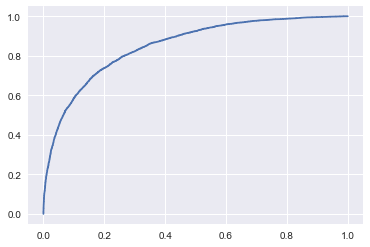

In [209]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)

In [210]:
df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Astapor,King's Landing,Winterfell,Android,iPhone
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,0,1,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,0,1,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,0,0,1,1,0
5,10.56,5.0,3.5,1.00,0.0,2,True,100.0,0,0,1,0,1
6,3.95,4.0,NaN,1.00,0.0,1,False,100.0,1,0,0,1,0
7,2.04,5.0,5.0,1.00,0.0,2,False,100.0,0,0,1,0,1
8,4.36,5.0,4.5,1.00,0.0,2,False,100.0,0,0,1,1,0
9,2.37,5.0,NaN,1.00,0.0,1,False,0.0,0,0,1,1,0


In [211]:
df2 = df.join(Ys)


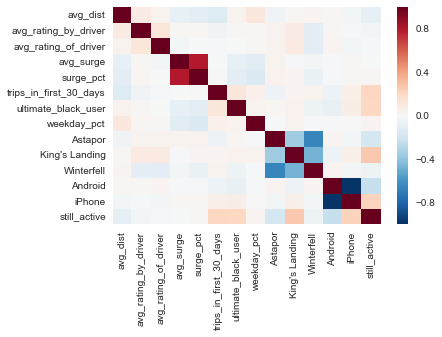

In [214]:
sns.heatmap(df2.corr())